# Batch Gradient Descent

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
X = 3 * np.random.rand(100,1)
y = 2 + X + np.random.randn(100,1)

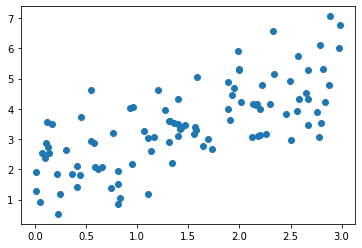

In [3]:
plt.scatter(X, y)

In [4]:
X_b = np.c_[np.ones((100,1)), X]
print(X_b.shape, y.shape)

(100, 2) (100, 1)


In [5]:

theta = np.random.randn(2,1)

def batch_descent(eta, theta):
    n_iterations = 1000
    m = 100
    for rep in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients
    return theta


In [6]:
eta = np.linspace(0, 0.1, 10)
thetas = []
for i in eta:
    thetas.append(batch_descent(eta, theta))

In [7]:
thetas

[array([[0.66559595, 1.84006904, 1.84431183, 1.84434855, 1.84434886,
         1.84434886, 1.84434886, 1.84434886, 1.84434886, 1.84434886],
        [0.04298649, 1.09580373, 1.09354819, 1.09352867, 1.09352851,
         1.09352851, 1.09352851, 1.09352851, 1.09352851, 1.09352851]]),
 array([[0.66559595, 1.84006904, 1.84431183, 1.84434855, 1.84434886,
         1.84434886, 1.84434886, 1.84434886, 1.84434886, 1.84434886],
        [0.04298649, 1.09580373, 1.09354819, 1.09352867, 1.09352851,
         1.09352851, 1.09352851, 1.09352851, 1.09352851, 1.09352851]]),
 array([[0.66559595, 1.84006904, 1.84431183, 1.84434855, 1.84434886,
         1.84434886, 1.84434886, 1.84434886, 1.84434886, 1.84434886],
        [0.04298649, 1.09580373, 1.09354819, 1.09352867, 1.09352851,
         1.09352851, 1.09352851, 1.09352851, 1.09352851, 1.09352851]]),
 array([[0.66559595, 1.84006904, 1.84431183, 1.84434855, 1.84434886,
         1.84434886, 1.84434886, 1.84434886, 1.84434886, 1.84434886],
        [0.04298649, 

In [8]:
X_new = np.array([[0.1], [3]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1. , 0.1],
       [1. , 3. ]])

In [9]:
ypreds = []
for i in thetas:
    ypreds.append(X_new_b.dot(i))

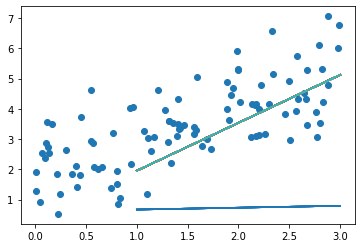

In [10]:
plt.scatter(X,y)
for i in ypreds:
    plt.plot(X_new_b[1],i)

# Stocasic Gradient Descent with learning schedule

In [11]:

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2, 1)

def Stochasic_descent(m, theta):
    n_epochs = 50
    t0, t1 = 5, 50
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients

In [12]:
iterations = [10,100,1000,10000]

thetas = []
for i in iterations:
    thetas.append
    
    

***Alternatively Sci-kit learn provides a Stocasic Gradient Descent function which defaults to optimizing the squared error cost***

In [13]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=50, penalty=None, eta0=0.01)
sgd.fit(X,y.ravel())

SGDRegressor(max_iter=50, penalty=None)

In [14]:
sgd.intercept_

array([1.57418212])

In [15]:
sgd.coef_

array([1.23921604])

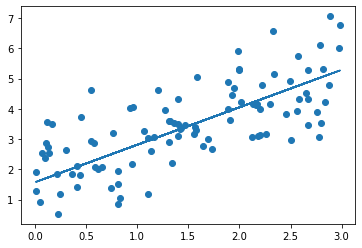

In [16]:
plt.scatter(X, y)
y_fit = (sgd.coef_)*X + sgd.intercept_
plt.plot(X, y_fit)

## Mini-Batch Gradient Descent
Similar to Stochasic Gradient Descent the algorithm calculates the gradient on a subset of the full training set. In Mini-Batch Gradient Descent the process is performed on multiple random samples of the training set. This can be optimal when using multiple GPU's. The progress in parameter space is less erratic than SGD making it more likely to lock onto a local minimum however will be more accuracte at finding the minimum.


## Polynomial Regression

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + np.random.randn(m, 1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)
X[1]

array([1.90034068])

In [19]:
X_poly[1]

array([1.90034068, 3.61129472])

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
coef = lin_reg.coef_
intercept = lin_reg.intercept_
coef

array([[-0.03164289,  0.49559395]])

In [21]:
intercept

array([-0.08880027])

In [22]:
y_fit = (coef[0][1] * np.square(X) + coef[0][0] * X + intercept)


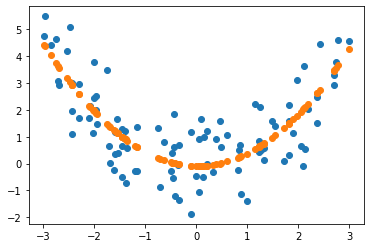

In [23]:
plt.scatter(X, y)
plt.scatter(X, y_fit)

### Learning curve
The learning curve shows the performance of the models on the training and test sets as a function of the training sets size. This below graph shows that any increase in the size of the training data above 40 does not result in any significant gains in performance

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")

Text(0, 0.5, 'RMSE')

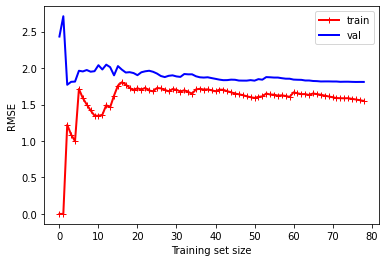

In [25]:
lin_reg = LinearRegression()
plot_learning(lin_reg, X, y)
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")


The plateau in performance of the model occurs because the data is not particularly linear and thereofre a linear model will not be able to get a perfect score.

## Regularized Linear Models
when a model may be overfitting a good way to reduce its complexity is to regulaize it. if the model is a polynomial a good way to do this may be to reduce the degress of the polynomial model

***Ridge Regression***
a scaled sum of all the linear parameters is added to the cost function to aim the model to reduce the weights as much as possible.

* it is important to scale the model before you use a regularized linear model as they are very sensitive to the scale of the inputs

In [26]:
# You can perform Ridge regression in two ways. 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.2]])

array([[1.17673497]])

In [27]:
lin_reg = SGDRegressor(penalty='l2') # adds half the eulicidean norm squared of the parameter 
# weights to the cost function 
lin_reg.fit(X, y)
lin_reg.predict([[1.2]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1.14113807])

## Lasso Regression
similar to ridge regression it adds a additional parameter to the cost function. This time it is the sum of the regular norm of the weight vector instead of the square of the eulicidiean norm. An intressting feature of Lasso Regression is that it sets the least important feature weights to zero. Lasso Regression automatically performs feature selection and outputs a sparse model. This will reduce the complexity and therefore overfitting

In [28]:
from sklearn.linear_model import Lasso 
las = Lasso(alpha=0.1)
las.fit(X, y)
las.predict([[1.2]])

array([1.2255222])

## Elastic Net
elastic net is a mixture of both lasso and Ridge Resgression. The term added to the cost function contains a mixture of both. You can set the mix using the r hyperparameter. when r=0 Elastic Net regression is equivalent to ridge. and if r=1 is the same as Lasso. 

In [29]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X, y)
elastic.predict([[1.2]])

array([1.20308802])

It is alway preferable to have some Regulization in your linear models so best avoid Linear Regression. Ridge is a good option however if you know that some of your features may not be very useful is Lasso Regression or a combination of them in Elastic Net.

## Early Stopping

an epoch is a term that indicates the number of passes of the entire training dataset an algorithm has completed. e.g. each pass on a batch in mini-Batch GD. The larger the number of batches used to fit the model the more complex it can become. 

at somepoint the more epochs passed the more complicated the model becomes. At somepoint the model will stop becomming more accurate and start overfitting to the training data. Early Stopping stops training the data once this point has been reached the the more epochs passed the worse the RMSE becomes.

In [30]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


X = 3 * np.random.rand(10000,1)
y = 2 + X + np.random.randn(10000,1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

In [31]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.reshape(len(X_train_poly_scaled),)) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [32]:
best_epoch

2

In [33]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

# Logistic Regression

logistic regression is a binary classifier. It is most commonly used to predict an instance belongs to a particular class. if prediction is above 50% the instance belongs to the target class.

logistic regression like other linear models computes a weighted sum of the input featrues plus a bias term. However the output is a log of this result. The result is that the model estimages high probabilities for positive instanes and low probabilities for negative instances. The benefit of Logistic regression is that its accuracy it not reduced by the effect of outliers in the training sets.

In [34]:
from sklearn import datasets 
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [35]:
X = iris['data'][:, 3:] #Petal width 
y = (iris["target"] == 2).astype(np.int)# 1 if iris-virginica, else 0
print(X.shape, y.shape)

(150, 1) (150,)


In [36]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'probability Iris-virginica')

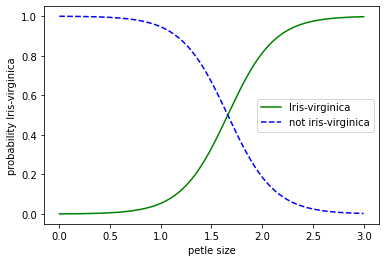

In [37]:
X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = 'Iris-virginica')
plt.plot(X_new, y_proba[:, 0], "b--", label="not iris-virginica")
plt.legend(loc='best')
plt.xlabel('petle size')
plt.ylabel('probability Iris-virginica')

In [38]:
pd.DataFrame(y_proba).head() #columns are probability instance belongs to each catagory

,0,1
0,0.99925,0.00075
1,0.99924,0.00076
2,0.99923,0.00077
3,0.99922,0.00078
4,0.99921,0.00079


Just like other linear models, Logistic Regression models can be regularized using l1 or l2 penalties, Scikit-Learn adds l2 penalty by defualt.

## Softmax Regression
The logistic Regression model can be generalized to support multiple classes without having to train multiple binary classifiers. The softmax regression model predicts a score for each catagory and then the softmax function also called the normalized exponential estimates the probability of each class. 

In [39]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [40]:
softmax_reg.predict([[5, 2]])

array([2])

In [41]:
softmax_reg.predict_proba([[5, 2]])
# below is the probabilities that the instance belongs to a specific class

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

##Exercises 
1. 
2. 
3. x
4. 
5. 
6. 
7. actually converge and how can you make the others converge as well?
8. 
9.
10. 